# IMAGE CLASSIFICATION USING CIFAR-10 DATASET: A COMPARISON OF MANHATTAN (L1) AND EUCLIDEAN (L2) DISTANCES WITH 5-FOLD CROSS-VALIDATION


### **AMERICAN INTERNATIONAL UNIVERSITY-BANGLADESH (AIUB)**  
**Name:** AZMINUR RAHMAN  
**ID:** 22-46588-1  
**Course:** COMPUTER VISION AND PATTERN RECOGNITION  
**Section:** A  
**Course Teacher:** DR. DEBAJYOTI KARMAKER  

---

**Assignment 1**

# Download dataset from kaggle [Dataset Link](https://www.kaggle.com/datasets/ashishsaxena2209/animal-image-datasetdog-cat-and-panda)

In [2]:
import kagglehub
dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

print('Dataset downloaded.')

Dataset downloaded.


# Importing libraries

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

# Dataset Loading and Preprocessing

1. Dataset Directory: Define the path to the "animals" folder within the dataset.
2. Categories: Retrieve the list of categories (subfolders) in the "animals" folder.
3. Image Processing:
   * Loop through each category and assign a unique label.
   * For each image, read it in BGR format and convert it to grayscale.
   * Resize each image to 32x32 pixels.
5. Store Data: Append the processed image and its label as a tuple (image, label) to train_data.
6. Progress Tracking: Use tqdm to show a progress bar as the images are being processed.

In [4]:
print(os.listdir(dataset))

['animals', 'images']


In [5]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['animals', 'images', 'dogs', 'panda', 'cats']


In [6]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['dogs', 'panda', 'cats']


In [7]:
categories = os.listdir(dataset)
print(categories)

['dogs', 'panda', 'cats']


In [8]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['dogs_00583.jpg', 'dogs_00683.jpg', 'dogs_00750.jpg', 'dogs_00652.jpg', 'dogs_00895.jpg', 'dogs_00686.jpg', 'dogs_00622.jpg', 'dogs_00291.jpg', 'dogs_00944.jpg', 'dogs_00082.jpg', 'dogs_00955.jpg', 'dogs_00309.jpg', 'dogs_00253.jpg', 'dogs_00416.jpg', 'dogs_00646.jpg', 'dogs_00463.jpg', 'dogs_00688.jpg', 'dogs_00732.jpg', 'dogs_00137.jpg', 'dogs_00602.jpg', 'dogs_00647.jpg', 'dogs_00976.jpg', 'dogs_00636.jpg', 'dogs_00226.jpg', 'dogs_00359.jpg', 'dogs_00684.jpg', 'dogs_00370.jpg', 'dogs_00676.jpg', 'dogs_00500.jpg', 'dogs_00716.jpg', 'dogs_00294.jpg', 'dogs_00041.jpg', 'dogs_00544.jpg', 'dogs_00124.jpg', 'dogs_00429.jpg', 'dogs_00279.jpg', 'dogs_00821.jpg', 'dogs_00957.jpg', 'dogs_00846.jpg', 'dogs_00843.jpg', 'dogs_00391.jpg', 'dogs_00519.jpg', 'dogs_00452.jpg', 'dogs_00618.jpg', 'dogs_00875.jpg', 'dogs_00381.jpg', 'dogs_00692.jpg', 'dogs_00917.jpg', 'dogs_00167.jpg', 'dogs_00122.jpg', 'dogs_00473.jpg', 'dogs_00625.jpg', 'dogs_00753.jpg', 'dogs_00835.jpg', 'dogs_00660.jpg', 'dogs_00

In [9]:
import random

train_data = []
max_images_per_class = 100

for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)

    image_files = os.listdir(path)[:max_images_per_class]

    for img in tqdm(image_files, desc=f"Loading {category}"):
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)

        if img_bgr is None:
            continue

        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_array = cv2.resize(img_gray, (32, 32))
        train_data.append((img_array, label))

Loading cats: 100%|██████████| 100/100 [00:00<00:00, 197.74it/s]


In [10]:
print(f"Total loaded samples: {len(train_data)}")

Total loaded samples: 300


In [11]:
print([train_data[i][1] for i in range(10)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
np.random.shuffle(train_data)

In [13]:
print([train_data[i][1] for i in range(10)])

[1, 0, 1, 1, 0, 2, 0, 2, 1, 0]


# Visualizing the dataset

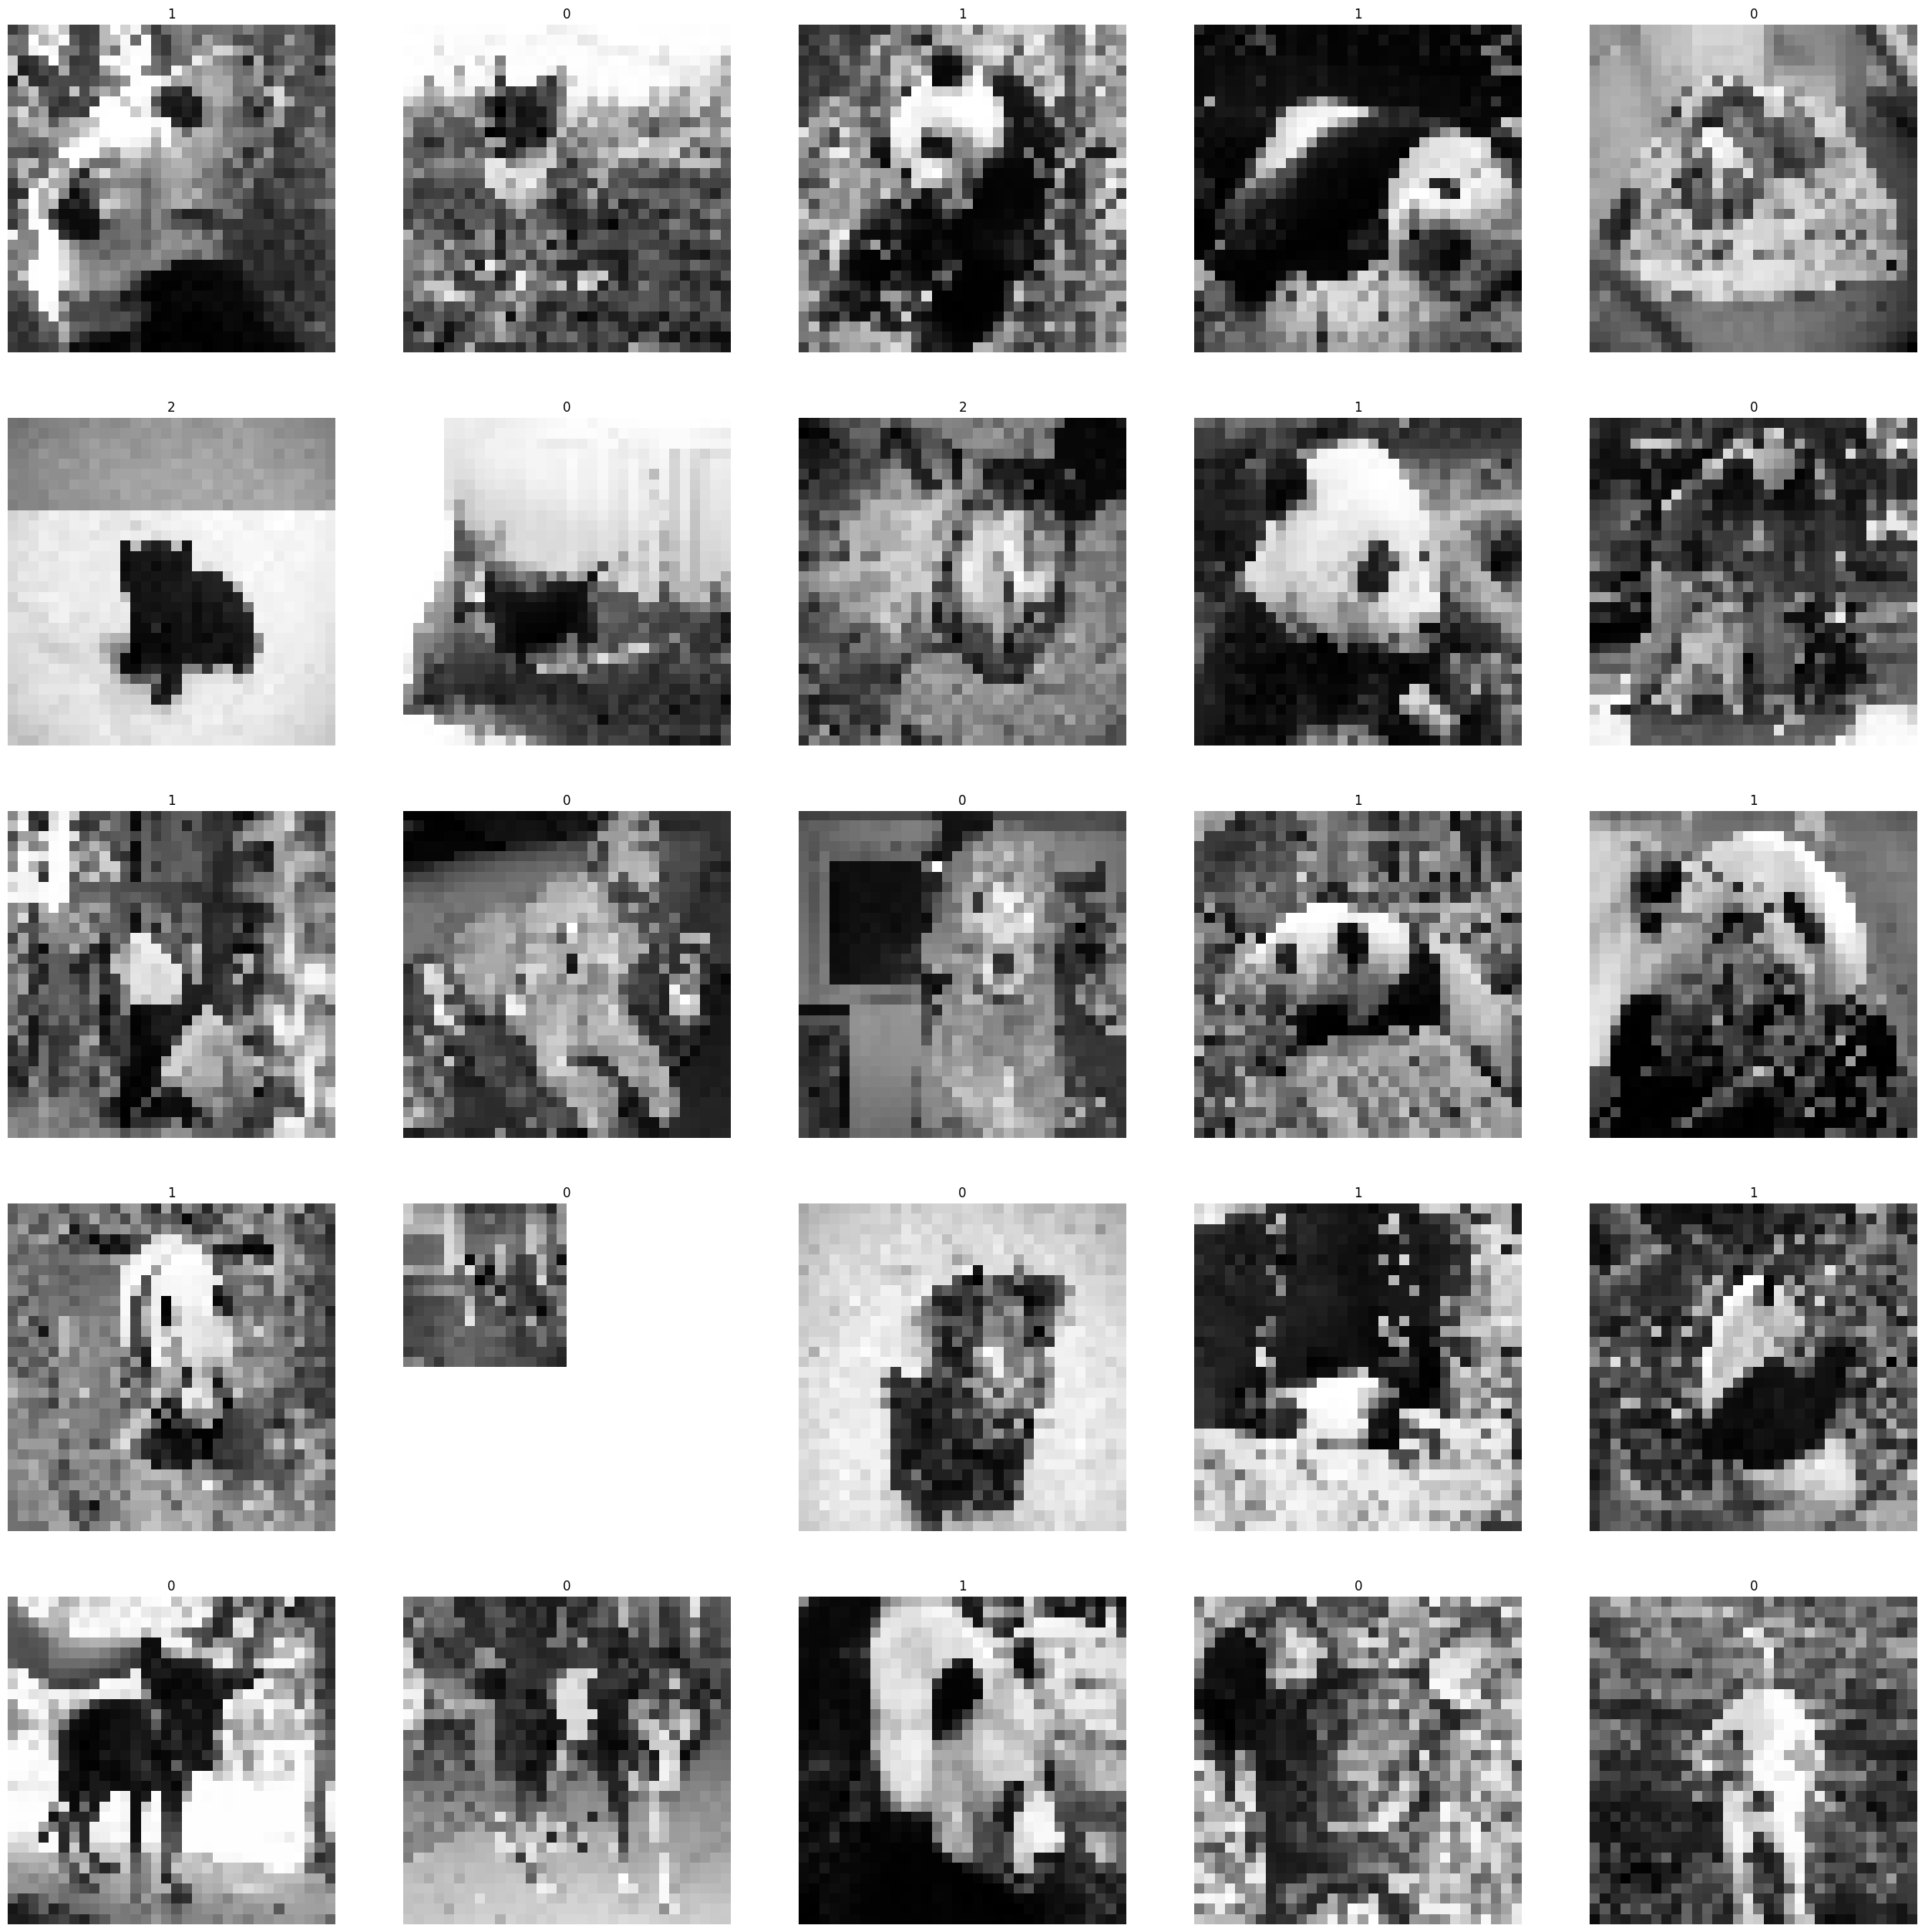

In [14]:
fig, axes = plt.subplots(5, 5, figsize=(32, 32))

for (img_array, label), ax in zip(train_data, axes.flat):
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label)
    ax.axis('off')

plt.show()

# Separating Data into Folds for Cross-Validation

The code creates 5 folds from train_data by selecting every 5th element starting from indices i = 0, 1, 2, 3, 4. This is done using slicing in Python. The resulting folds will contain 5 separate subsets of the data, where each fold is a sample of every 5th element starting from its corresponding index.

For example, for i = 0 fold will contain [0, 5, 10, 15, 21, 26,...]th elements of train_data

The length of folds will be 5, representing the 5 different subsets.

In [15]:
folds = [train_data[i::5] for i in range(5)]
len(folds)

5

In [16]:
for i, fold in enumerate(folds):
    labels = [label for _, label in fold]
    print(f"Fold {i+1}:")
    print(f"Labels: {labels}")
    print(f"Count: {len(fold)}")
    print(f" ")

Fold 1:
Labels: [1, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0]
Count: 60
 
Fold 2:
Labels: [0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1]
Count: 60
 
Fold 3:
Labels: [1, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2]
Count: 60
 
Fold 4:
Labels: [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0]
Count: 60
 
Fold 5:
Labels: [0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0, 

# Fucntion for calculating L2 Distance (Euclidean Distance)

In [17]:
def l2_distance(valid_img, train_img):
    return np.sqrt(np.sum(np.square(valid_img - train_img)))


# Fucntion for calculating L1 Distance (Manhattan Distance)

In [18]:
def l1_distance(valid_img, train_img):
    return np.sum(np.abs(valid_img - train_img))

# k-Nearest Neighbors (kNN) Prediction Function

This function predicts the label of a point based on its k nearest neighbors.

1. Nearest Neighbors Selection: It first selects the k nearest neighbors from the list l2_distances or l1_distances.
2. Extracting Labels: Then, it extracts the labels associated with these neighbors.
3. Majority Vote: Using the Counter class, it finds the most common label among these neighbors.
4. Return Prediction: Finally, the most common label is returned as the predicted label.

This method uses majority voting to make a prediction for the label based on the closest neighbors.

In [19]:
from collections import Counter

def knn_prediction(distances, k=1):
    nearest_neighbors = distances[:k]
    labels = [label for _, label in nearest_neighbors]
    label_counts = Counter(labels)
    most_common_label = label_counts.most_common(1)[0][0]

    return most_common_label

# k-Nearest Neighbors (kNN) Cross-Validation with Accuracy Calculation for L2


1. **Loop Over K Values:** The function performs the k-nearest neighbors (kNN) prediction for values of k from 1 to 30.
2. **Cross-Validation:** It uses 5-fold cross-validation to evaluate performance. For each fold, the model trains on the remaining 4 folds and tests on the current fold.
3. **Prediction:** For each test image in the validation set, the kNN function computes the L2 (Euclidean) distance to each training image and predicts the label based on majority voting.
4. **Accuracy Calculation:** The accuracy for each fold is calculated by comparing predictions to the true labels.
5. **Store Results:** The fold accuracies and the average accuracies for each k are stored and printed.

In [20]:
fold_accuracies_2 = []  
avg_accuracies_2 = []  

for k in range(1, 31):
  accuracies = []
  for i in range(len(folds) - 1, -1, -1):
    predictions = []

    valid_set = folds[i]
    train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]

    for valid_img in valid_set:
      l2_distances = []   
      for train_img in train_set:
        distance = l2_distance(valid_img[0], train_img[0])
        l2_distances.append((distance, train_img[1]))
      l2_distances.sort()
      predicted_label = knn_prediction(l2_distances, k)

      if predicted_label == valid_img[1]:
        predictions.append(1)
      else:
        predictions.append(0)

    fold_accuracy = sum(predictions) / len(predictions)   
    accuracies.append(fold_accuracy)

  fold_accuracies_2.append(accuracies)
  avg_accuracy = sum(accuracies) / len(accuracies)
  avg_accuracies_2.append(avg_accuracy)
  print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

print(f"Fold Accuracies: {fold_accuracies_2}")
print(f"Average Fold Accuracies: {avg_accuracies_2}")

K: 1 Average Accuracy: 0.47
K: 2 Average Accuracy: 0.47
K: 3 Average Accuracy: 0.46
K: 4 Average Accuracy: 0.47
K: 5 Average Accuracy: 0.44
K: 6 Average Accuracy: 0.47
K: 7 Average Accuracy: 0.48
K: 8 Average Accuracy: 0.48
K: 9 Average Accuracy: 0.48
K: 10 Average Accuracy: 0.49
K: 11 Average Accuracy: 0.48
K: 12 Average Accuracy: 0.46
K: 13 Average Accuracy: 0.49
K: 14 Average Accuracy: 0.49
K: 15 Average Accuracy: 0.46
K: 16 Average Accuracy: 0.48
K: 17 Average Accuracy: 0.50
K: 18 Average Accuracy: 0.49
K: 19 Average Accuracy: 0.48
K: 20 Average Accuracy: 0.49
K: 21 Average Accuracy: 0.52
K: 22 Average Accuracy: 0.50
K: 23 Average Accuracy: 0.50
K: 24 Average Accuracy: 0.51
K: 25 Average Accuracy: 0.53
K: 26 Average Accuracy: 0.52
K: 27 Average Accuracy: 0.54
K: 28 Average Accuracy: 0.53
K: 29 Average Accuracy: 0.53
K: 30 Average Accuracy: 0.51
Fold Accuracies: [[0.4166666666666667, 0.4166666666666667, 0.5, 0.5666666666666667, 0.45], [0.4166666666666667, 0.4166666666666667, 0.5, 0.

**k-Nearest Neighbors (kNN) Cross-Validation with Accuracy Calculation for L1**


1. **Loop Over K Values:** The function performs the k-nearest neighbors (kNN) prediction for values of k from 1 to 30.
2. **Cross-Validation:** It uses 5-fold cross-validation to evaluate performance. For each fold, the model trains on the remaining 4 folds and tests on the current fold.
3. **Prediction:** For each test image in the validation set, the kNN function computes the L1 (Manhattan) distance to each training image and predicts the label based on majority voting.
4. **Accuracy Calculation:** The accuracy for each fold is calculated by comparing predictions to the true labels.
5. **Store Results:** The fold accuracies and the average accuracies for each k are stored and printed.

In [21]:
fold_accuracies_1 = []  
avg_accuracies_1 = []  

for k in range(1, 31):
  accuracies = []
  for i in range(len(folds) - 1, -1, -1):
    predictions = []

    valid_set = folds[i]
    train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]

    for valid_img in valid_set:
      l1_distances = []   
      for train_img in train_set:
        distance = l1_distance(valid_img[0], train_img[0])
        l1_distances.append((distance, train_img[1]))
      l1_distances.sort()
      predicted_label = knn_prediction(l1_distances, k)

      if predicted_label == valid_img[1]:
        predictions.append(1)
      else:
        predictions.append(0)

    fold_accuracy = sum(predictions) / len(predictions)   
    accuracies.append(fold_accuracy)

  fold_accuracies_1.append(accuracies)
  avg_accuracy = sum(accuracies) / len(accuracies)
  avg_accuracies_1.append(avg_accuracy)
  print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

print(f"Fold Accuracies: {fold_accuracies_1}")
print(f"Average Fold Accuracies: {avg_accuracies_1}")

K: 1 Average Accuracy: 0.35
K: 2 Average Accuracy: 0.35
K: 3 Average Accuracy: 0.38
K: 4 Average Accuracy: 0.40
K: 5 Average Accuracy: 0.37
K: 6 Average Accuracy: 0.40
K: 7 Average Accuracy: 0.39
K: 8 Average Accuracy: 0.40
K: 9 Average Accuracy: 0.38
K: 10 Average Accuracy: 0.37
K: 11 Average Accuracy: 0.40
K: 12 Average Accuracy: 0.40
K: 13 Average Accuracy: 0.41
K: 14 Average Accuracy: 0.38
K: 15 Average Accuracy: 0.42
K: 16 Average Accuracy: 0.41
K: 17 Average Accuracy: 0.40
K: 18 Average Accuracy: 0.40
K: 19 Average Accuracy: 0.40
K: 20 Average Accuracy: 0.41
K: 21 Average Accuracy: 0.40
K: 22 Average Accuracy: 0.40
K: 23 Average Accuracy: 0.39
K: 24 Average Accuracy: 0.38
K: 25 Average Accuracy: 0.39
K: 26 Average Accuracy: 0.37
K: 27 Average Accuracy: 0.39
K: 28 Average Accuracy: 0.36
K: 29 Average Accuracy: 0.37
K: 30 Average Accuracy: 0.35
Fold Accuracies: [[0.35, 0.36666666666666664, 0.36666666666666664, 0.26666666666666666, 0.4], [0.35, 0.36666666666666664, 0.366666666666666

# Visualizing Cross-validation Accuracy for k-Nearest Neighbors (kNN)

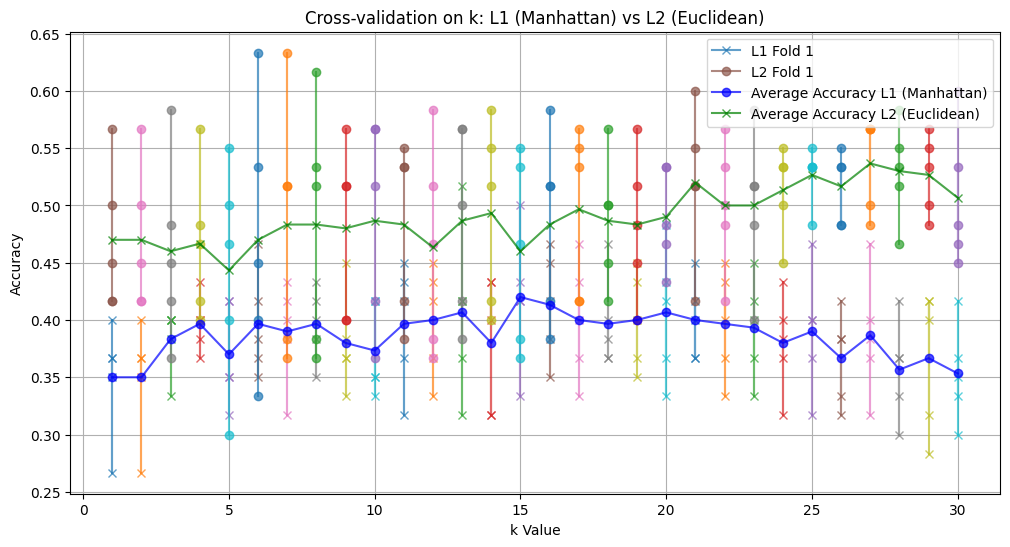

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

colors = plt.cm.tab10.colors

for k in range(30):
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1, linestyle='-', marker='x', alpha=0.7, color=colors[k % len(colors)], label=f'L1 Fold {k+1}' if k == 0 else "")

    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2, linestyle='-', marker='o', alpha=0.7, color=colors[(k+5) % len(colors)], label=f'L2 Fold {k+1}' if k == 0 else "")

plt.plot(range(1, 31), avg_accuracies_1, color='blue', alpha=0.7, label='Average Accuracy L1 (Manhattan)', linestyle='-', marker='o')
plt.plot(range(1, 31), avg_accuracies_2, color='green', alpha=0.7, label='Average Accuracy L2 (Euclidean)', linestyle='-', marker='x')

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k: L1 (Manhattan) vs L2 (Euclidean)')

plt.grid(True)
plt.legend()

plt.show()

# Top 5 predictions Euclidean (L2)

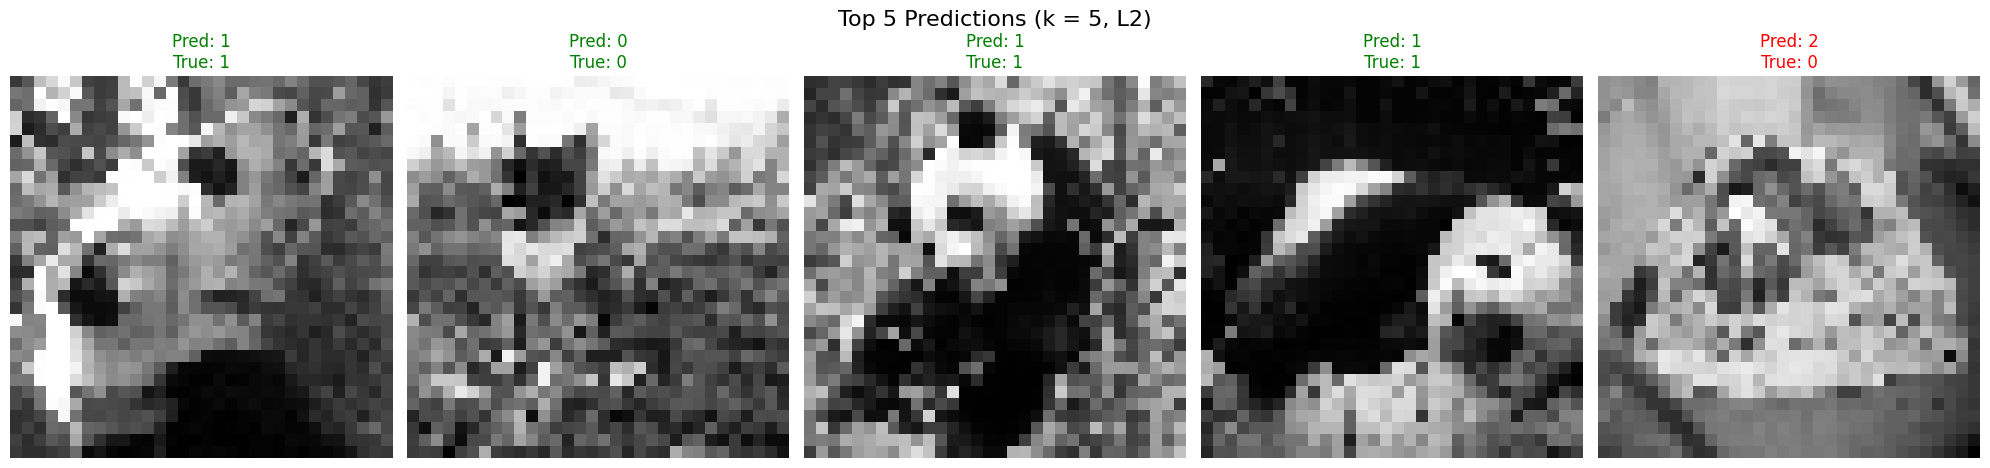

In [23]:
test_samples = train_data[:5]

k_best = 5
distance_function = l2_distance

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    axes[idx].set_title(f"Pred: {predicted_label}\nTrue: {true_label}", color='green' if predicted_label == true_label else 'red')
    axes[idx].axis('off')

plt.suptitle(f"Top 5 Predictions (k = {k_best}, {'L2' if distance_function == l2_distance else 'L1'})", fontsize=16)
plt.tight_layout()
plt.show()


# Top 5 predictions Manhattan (L1)

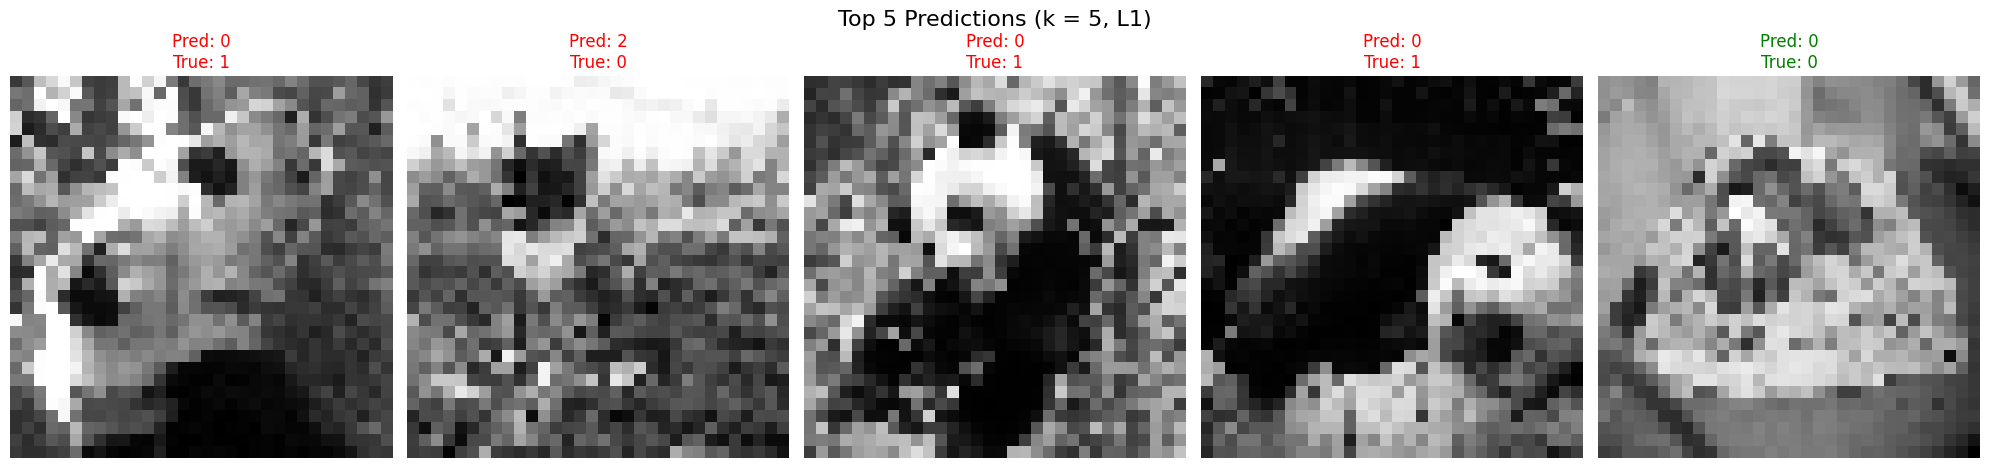

In [24]:
test_samples = train_data[:5]

k_best = 5
distance_function = l1_distance

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    axes[idx].set_title(f"Pred: {predicted_label}\nTrue: {true_label}", color='green' if predicted_label == true_label else 'red')
    axes[idx].axis('off')

plt.suptitle(f"Top 5 Predictions (k = {k_best}, {'L2' if distance_function == l2_distance else 'L1'})", fontsize=16)
plt.tight_layout()
plt.show()